# IMPORTANT NOTICE:
Code still in progress!
Don't edit or run the code in this script before contacting Guoyao Shen.

## Loading of Steinmetz data

includes some visualizations

In [24]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [25]:
#@title Data loading
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

dict_keys(['spks', 'wheel', 'pupil', 'lfp', 'response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'brain_area', 'brain_area_lfp', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'trough_to_peak', 'waveform_w', 'waveform_u', 'active_trials', 'contrast_left_passive', 'contrast_right_passive', 'spks_passive', 'lfp_passive', 'pupil_passive', 'wheel_passive'])


`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




### test on "dat"

In [26]:
print(alldat.shape)

# print(dat.shape)

(39,)


In [27]:
print(dat['contrast_right'].shape)
print(dat['response'].shape)

# print(dat['contrast_right'].reshape(len(dat['contrast_right']),-1))

(340,)
(340,)


#### contruct data

In [75]:
cont_L = dat['contrast_left'].reshape(len(dat['contrast_left']),-1)
cont_R = dat['contrast_right'].reshape(len(dat['contrast_right']),-1)
response = dat['response']

X = np.hstack((cont_L, cont_R))
y = response
print(X.shape)
print(y.shape)
print(X)

(340, 2)
(340,)
[[0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [1.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.   0.5 ]
 [0.   1.  ]
 [1.   0.25]
 [0.25 1.  ]
 [0.   0.5 ]
 [0.25 1.  ]
 [0.5  0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.25 0.  ]
 [1.   0.5 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.5  1.  ]
 [0.25 0.  ]
 [0.25 0.25]
 [0.25 1.  ]
 [0.   0.25]
 [0.   0.  ]
 [0.5  0.25]
 [1.   0.25]
 [0.   0.  ]
 [0.   0.  ]
 [1.   0.5 ]
 [0.   0.  ]
 [0.   0.  ]
 [0.   0.  ]
 [0.5  0.  ]
 [0.5  0.25]
 [0.   1.  ]
 [0.5  0.  ]
 [0.5  0.5 ]
 [1.   0.5 ]
 [0.   0.5 ]
 [0.   0.  ]
 [0.25 0.  ]
 [0.25 0.5 ]
 [0.   0.25]
 [1.   0.5 ]
 [0.5  0.  ]
 [0.25 1.  ]
 [0.5  0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.25 0.  ]
 [1.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.5  0.  ]
 [0.   1.  ]
 [0.25 1.  ]
 [0.5  0.25]
 [0.   0.  ]
 [0.   0.  ]
 [0.25 0.5 ]
 [1.   0.25]
 [0.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   0.  ]
 [0.   0.  ]
 [1.   0.  ]
 [1.   0.25]
 [0.5  0.  ]
 [0.   0.  ]
 [0.25 0.5 ]
 [0.   0.  ]
 [0.5  0.

In [82]:
contrast_diff = dat['contrast_left'] - dat['contrast_right']
response_true = np.where(contrast_diff>0,1,contrast_diff)
response_true = np.where(response_true<0,-1,response_true)

y_true = response_true

idx_wrong = np.argwhere(response!=response_true).squeeze()
idx_correct = np.argwhere(response==response_true).squeeze()

# print('response_true', response_true)
# print('---------------------------------------')
# print('response_mouse', dat['response'])
# print('---------------------------------------')
# print(X)

wrong_response = response[idx_wrong]
wrong_response_true = response_true[idx_wrong]

correct_response = response[idx_correct]
correct_response_true = response_true[idx_correct]
# print(wrong_response.shape)

print(idx_wrong.shape)
print(idx_correct.shape)
# print(X[idx_wrong])
print('contrast_L, contrast_R, response, response_true')
print(np.hstack((X[idx_wrong], wrong_response[:, np.newaxis], wrong_response_true[:, np.newaxis])))
print('----------------------------------------------')
print(np.hstack((X[idx_correct], correct_response[:, np.newaxis], correct_response_true[:, np.newaxis])))

(104,)
(236,)
contrast_L, contrast_R, response, response_true
[[ 0.    0.    1.    0.  ]
 [ 0.5   0.5  -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.5   1.    1.   -1.  ]
 [ 0.25  0.   -1.    1.  ]
 [ 0.25  0.25  1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.5   0.   -1.    1.  ]
 [ 0.5   0.25 -1.    1.  ]
 [ 0.5   0.5   1.    0.  ]
 [ 1.    1.   -1.    0.  ]
 [ 0.5   0.25 -1.    1.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.25  0.5   1.   -1.  ]
 [ 0.25  0.25 -1.    0.  ]
 [ 0.25  0.25  1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.   -1.    0.  ]
 [ 0.    0.    1.   

#### construct model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

model_logistic_reg = LogisticRegression().fit(X, y)
print(model_logistic_reg.score(X, y))

model_logistic_reg2 = LinearRegression().fit(X, y)
print(model_logistic_reg2.score(X, y))

model_logistic_reg3 = LogisticRegression(penalty='none').fit(X, y_true)
print(model_logistic_reg3.score(X, y_true))

model_logistic_reg4 = LinearRegression().fit(X, y_true)
print(model_logistic_reg4.score(X, y_true))

0.6970588235294117
0.47428133356258073
1.0
0.8364186976014338


In [81]:
print(model_logistic_reg2.coef_)
print(model_logistic_reg4.coef_)

[ 1.48090839 -0.74415451]
[ 1.36096308 -1.321185  ]


## Orig Tutorial

`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




In [88]:
# test

response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high

print(dat['spks'].shape)
print(dat['spks'][:,response>0].shape)

(698, 340, 250)
(698, 135, 250)


In [106]:
#@title import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [10, 4]  #[20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

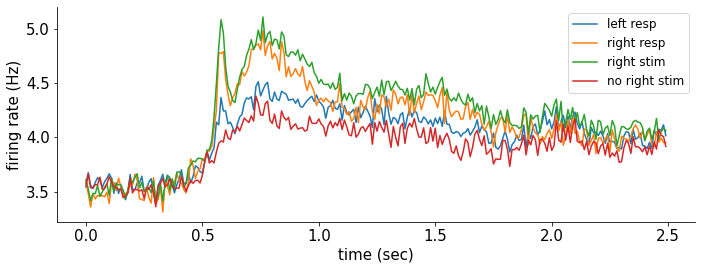

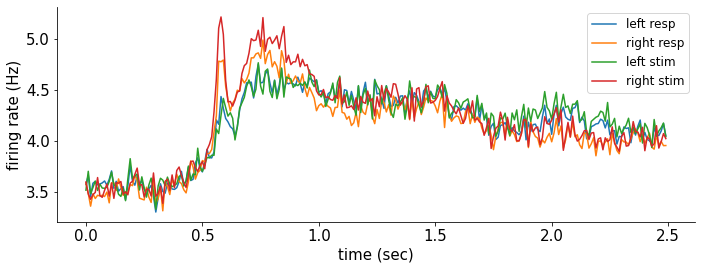

In [110]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]

# ax = plt.subplot(1,5,1)
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
vis_diff = vis_left - vis_right

plt.figure(1)
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
plt.xlabel('time (sec)');
plt.ylabel('firing rate (Hz)');





plt.figure(2)
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_diff>0].mean(axis=(0,1))) # stimulus on the left
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_diff<0].mean(axis=(0,1))) # stimulus on the right

plt.legend(['left resp', 'right resp', 'left stim', 'right stim'], fontsize=12)
# ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');
plt.xlabel('time (sec)');
plt.ylabel('firing rate (Hz)');

In [117]:
# print([dat['brain_area']])

In [111]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

In [119]:
print(barea.shape)
# print(barea)

(698,)


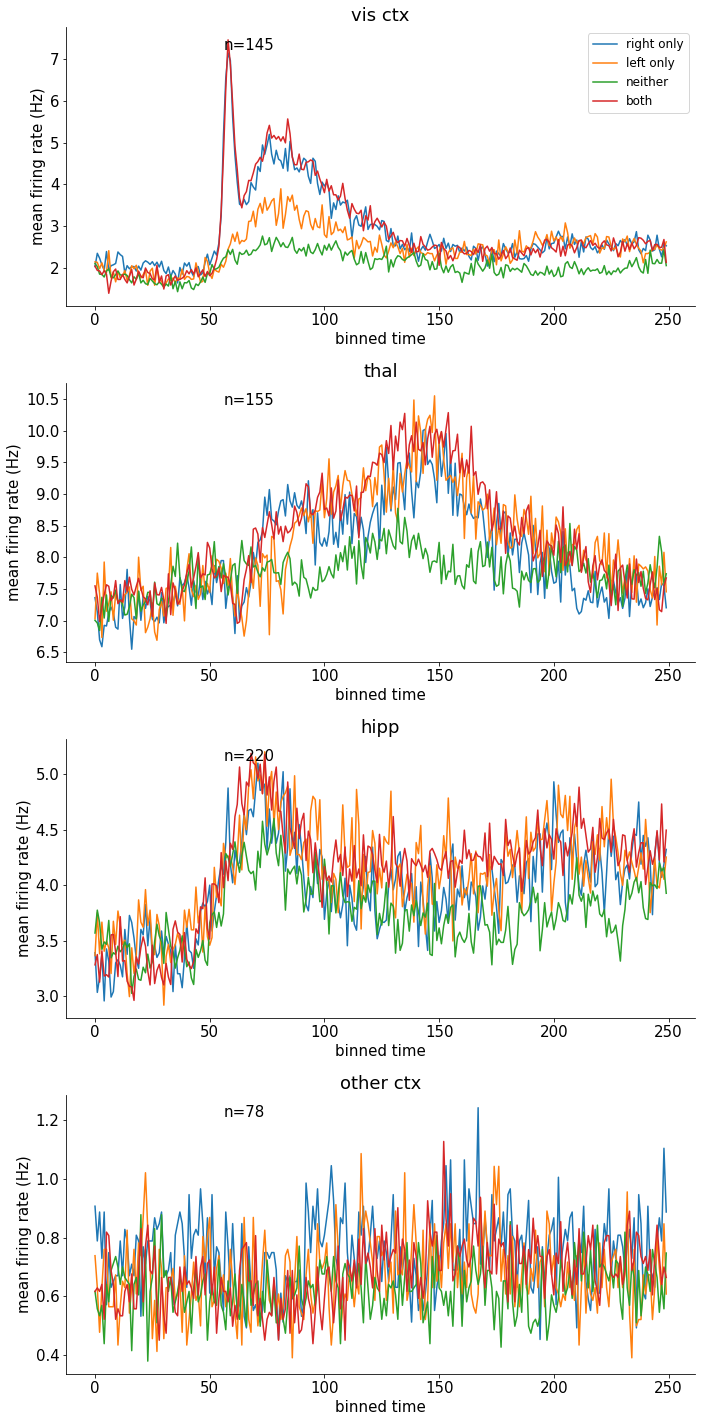

In [115]:
#@title plots by brain region and visual conditions
rcParams['figure.figsize'] = [10, 20]  #[20, 4]

for j in range(nareas):
#   ax = plt.subplot(1,nareas,j+1)
  ax = plt.subplot(nareas,1,j+1)
  
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0, vis_right>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left==0 , vis_right==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks'][barea==j][:,np.logical_and(vis_left>0, vis_right>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)', title = regions[j])


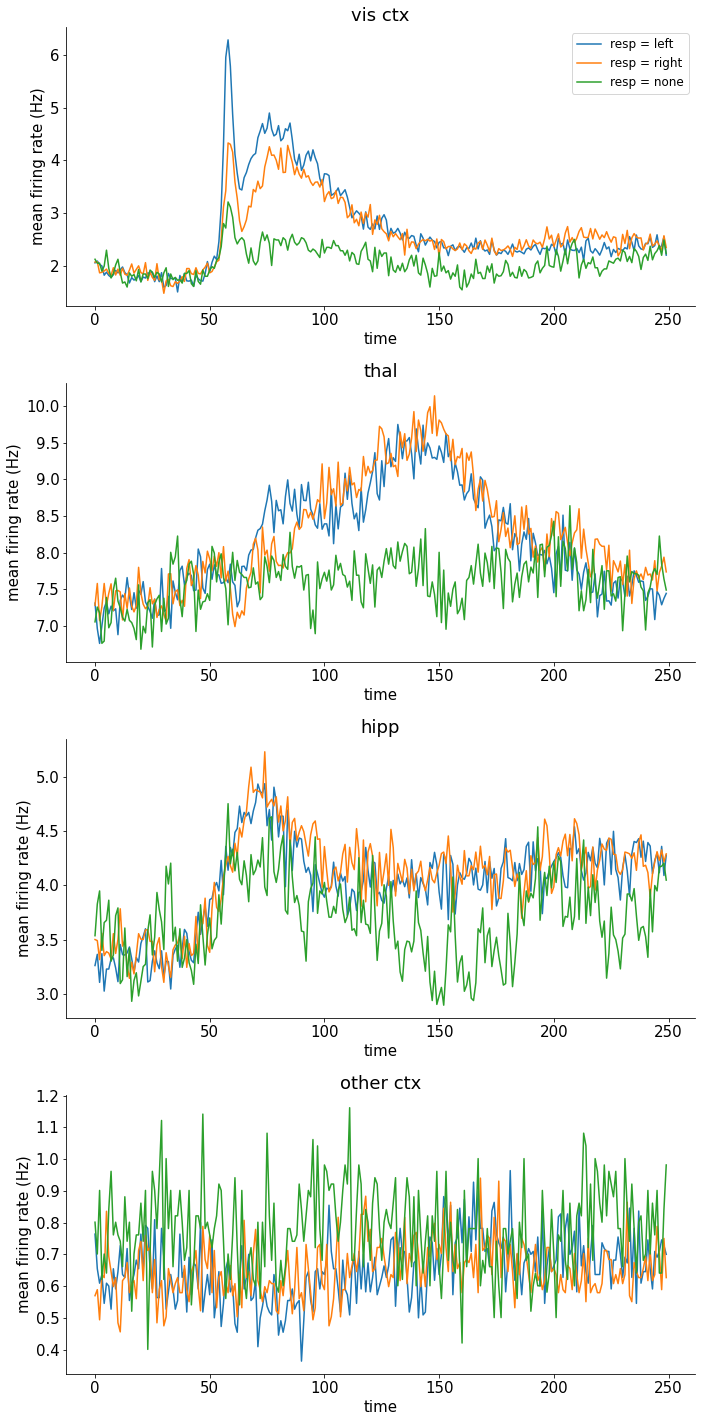

In [120]:
#@title plots by brain region and response type
rcParams['figure.figsize'] = [10, 20]  #[20, 4]

for j in range(nareas):
#   ax = plt.subplot(1,nareas,j+1)
  ax = plt.subplot(nareas,1,j+1)

  plt.title(regions[j])
  if np.sum(barea==j)==0:
    continue
  plt.plot(1/dt * dat['spks'][barea==j][:,response<0].mean(axis=(0,1)))  
  plt.plot(1/dt * dat['spks'][barea==j][:,response>0].mean(axis=(0,1)))
  plt.plot(1/dt * dat['spks'][barea==j][:,response==0].mean(axis=(0,1)))
 
  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=12)
  ax.set(xlabel = 'time', ylabel = 'mean firing rate (Hz)')


In [121]:
#@title top PC directions from stimulus + response period, with projections of the entire duration
from sklearn.decomposition import PCA 

droll = np.reshape(dat['spks'][:,:,51:130], (NN,-1)) # first 80 bins = 1.6 sec
droll = droll - np.mean(droll, axis=1)[:, np.newaxis]
model = PCA(n_components = 5).fit(droll.T)
W = model.components_
pc_10ms = W @ np.reshape(dat['spks'], (NN,-1))
pc_10ms = np.reshape(pc_10ms, (5, -1, NT))

In [129]:
print(droll.shape)
print(W.shape)
print( np.reshape(dat['spks'], (NN,-1)).shape )
print(pc_10ms.shape)

(698, 26860)
(5, 698)
(698, 85000)
(5, 340, 250)


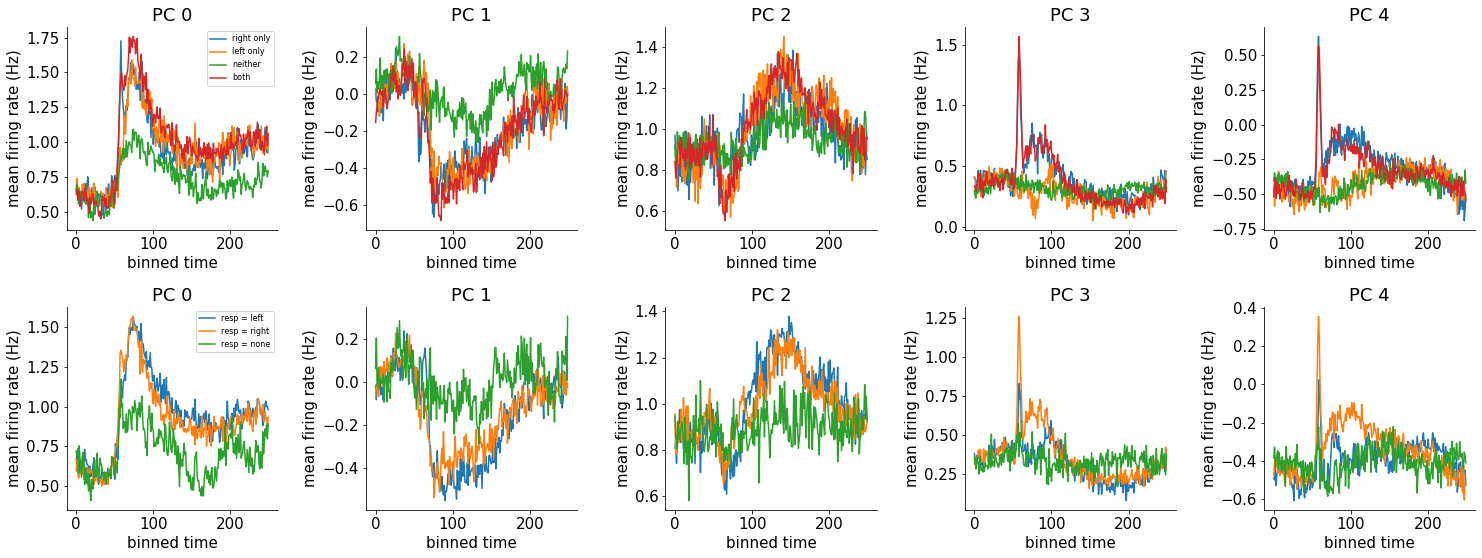

In [128]:
#@title The top PCs capture most variance across the brain. What do they care about? 
# plt.figure(figsize= (20, 6))
plt.figure(figsize= (25, 8))
for j in range(len(pc_10ms)):
  ax = plt.subplot(2,len(pc_10ms)+1,j+1)
  pc1 = pc_10ms[j]

  plt.plot(pc1[np.logical_and(vis_left==0, vis_right>0), :].mean(axis=0))  
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left==0, vis_right==0), :].mean(axis=0))
  plt.plot(pc1[np.logical_and(vis_left>0, vis_right>0), :].mean(axis=0))
   
  if j==0:
    plt.legend(['right only', 'left only', 'neither', 'both'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

  ax = plt.subplot(2,len(pc_10ms)+1,len(pc_10ms)+1 + j+1)
  
  plt.plot(pc1[response>0, :].mean(axis=0))  
  plt.plot(pc1[response<0, :].mean(axis=0))
  plt.plot(pc1[response==0, :].mean(axis=0))

  if j==0:
    plt.legend(['resp = left', 'resp = right', 'resp = none'], fontsize=8)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')
  plt.title('PC %d'%j)

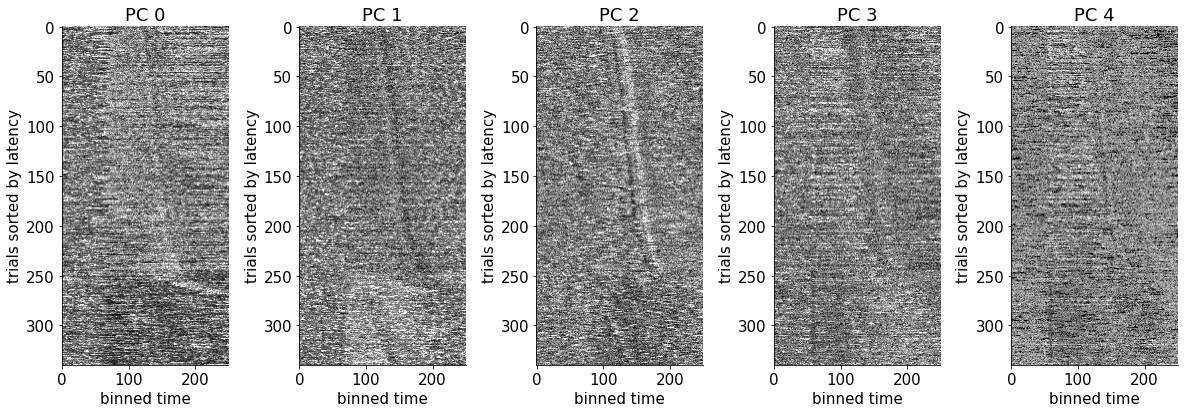

In [131]:
#@title now sort all trials by response latency and see if the PCs care about that.
plt.figure(figsize= (20, 6))

from scipy.stats import zscore

isort = np.argsort(dat['response_time'].flatten())

for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time', ylabel = 'trials sorted by latency')
  plt.title('PC %d'%j)

In [134]:
print(isort.shape)
print(pc1.shape)

(340,)
(340, 250)


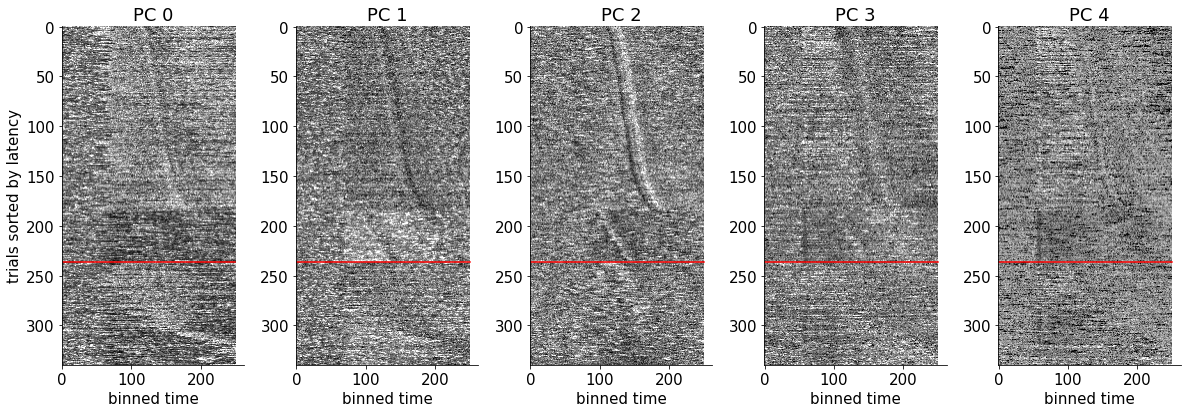

In [153]:
#@title correct vs incorrect trials
# the following are the correct responses:
# if vis_left > vis_right : response >0
# if vis_left < vis_right : response <0
# if vis_left = vis_right : response =0
# trials below red line are incorrect
plt.figure(figsize= (20, 6))


is_correct = np.sign(response)==np.sign(vis_left-vis_right)

# sort by correct, and then by response
# isort = np.argsort(-is_correct.astype('float32') + response/10) 
isort = np.argsort(-is_correct.astype('float32') + dat['response_time'].squeeze()/dat['response_time'].max()) 

nwrong = np.sum(is_correct)
for j in range(len(pc_10ms)):
  ax = plt.subplot(1,len(pc_10ms)+1,j+1)
  pc1 = zscore(pc_10ms[j])
  plt.imshow(pc1[isort, :], aspect='auto', vmax=2, vmin = -2, cmap = 'gray')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  
  plt.title('PC %d'%j)

  plt.plot([0, NT], [nwrong, nwrong], 'r')


In [152]:
# print(is_correct)
# print(-is_correct.astype('float32'))
# print(isort)
print(response.shape)
print(dat['response_time'].shape)
# print(response.max())
print(dat['response_time'].max())
print(dat['response_time'].min())
# print(nwrong)

(340,)
(340, 1)
2.305947575606069
0.47941449767444055


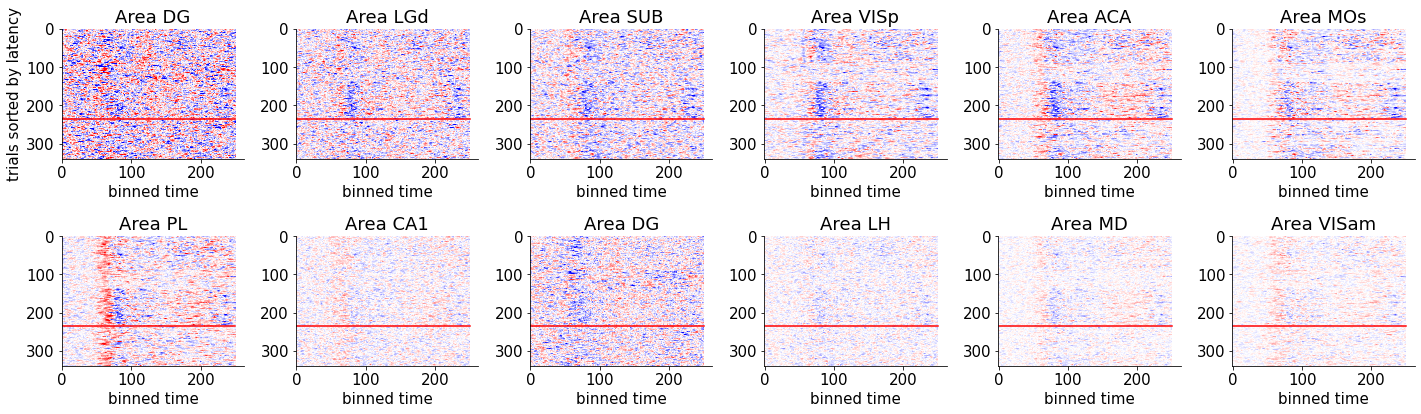

In [39]:
# plot the LFP

is_correct = np.sign(response)==np.sign(vis_left-vis_right)
isort = np.argsort(-is_correct.astype('float32') + response/10) # sort by correct, and then by response

nwrong = np.sum(is_correct)
plt.figure(figsize=(20,6))
for j in range(len(dat['lfp'])):
  ax = plt.subplot(2,6,j+1)
  plt.imshow(dat['lfp'][j, isort], cmap = 'bwr', vmax = 50, vmin=-50, aspect='auto')
  plt.title('Area %s'%dat['brain_area_lfp'][j])
  
  plt.plot([0, NT], [nwrong, nwrong], 'r')
  ax.set(xlabel = 'binned time')
  if j==0:
    ax.set(ylabel = 'trials sorted by latency')  


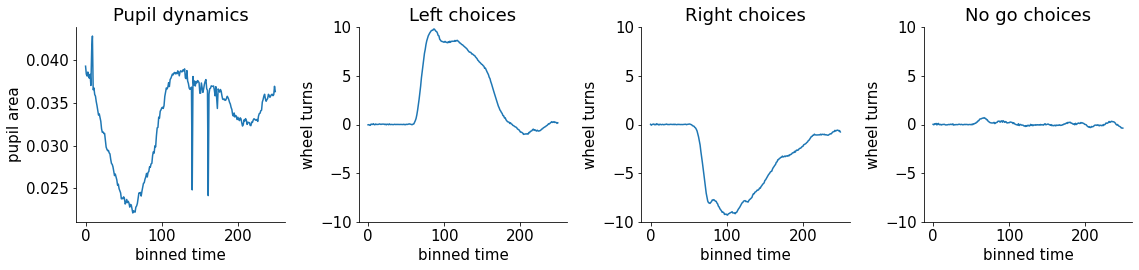

In [40]:
# plot the behavioral data (pupil area is noisy because it's very small)

ax = plt.subplot(1,5,1)
plt.plot(dat['pupil'][0, :].mean(0));
ax.set(ylabel='pupil area', xlabel = 'binned time', title='Pupil dynamics')

yl = [-10, 10]
ax = plt.subplot(1,5,2)
plt.plot(dat['wheel'][0, response>0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Left choices');

ax = plt.subplot(1,5,3)
plt.plot(dat['wheel'][0, response<0].mean(0));
ax.set(ylim=yl)
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='Right choices');

ax = plt.subplot(1,5,4)
plt.plot(dat['wheel'][0, response==0].mean(0));
ax.set(ylim=yl, ylabel='wheel turns', xlabel = 'binned time', title='No go choices');


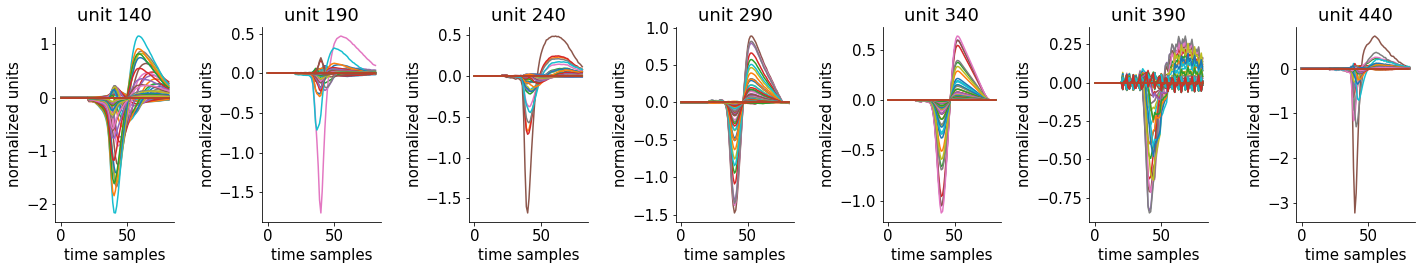

In [41]:
# plot the spike waveforms for some neurons. Sometimes these can tell us what cell type the neuron is 
# (i.e. fast spiking interneurons have short waveforms)

for j in range(7):
  ax = plt.subplot(1,7,j+1)
  kk = 140 + j * 50
  wav = dat['waveform_w'][kk] @ dat['waveform_u'][kk]
  plt.plot(wav)
  ax.set(xlabel = 'time samples', title ='unit %d'%kk, ylabel = 'normalized units')

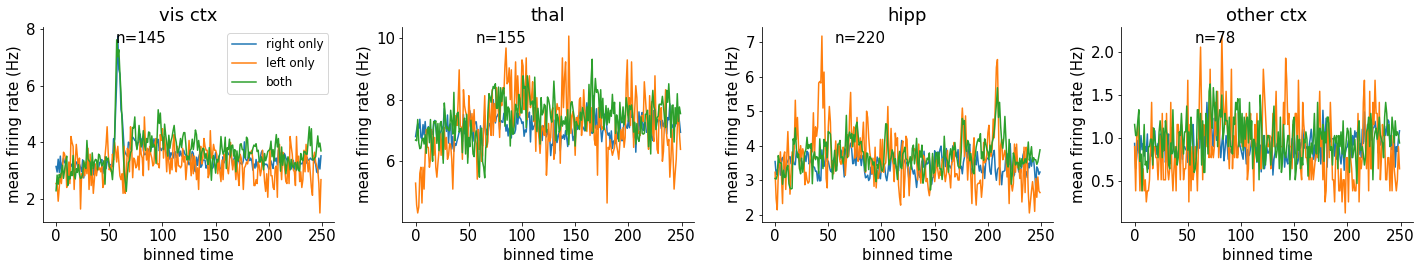

In [42]:
# plots by brain region and visual conditions for PASSIVE trials
vis_left_p = dat['contrast_left_passive']
vis_right_p = dat['contrast_right_passive']
for j in range(nareas):
  ax = plt.subplot(1,nareas,j+1)
  plt.title(regions[j])
  
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0, vis_right_p>0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0 , vis_right_p==0)].mean(axis=(0,1)))
  #plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p==0 , vis_right_p==0)].mean(axis=(0,1)))
  plt.plot(1/dt *  dat['spks_passive'][barea==j][:,np.logical_and(vis_left_p>0, vis_right_p>0)].mean(axis=(0,1)))  
  plt.text(.25, .92, 'n=%d'%np.sum(barea==j), transform=ax.transAxes)
 
  if j==0:
    plt.legend(['right only', 'left only', 'both'], fontsize=12)
  ax.set(xlabel = 'binned time', ylabel = 'mean firing rate (Hz)')